In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
file_dest = 'https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/files/weather.csv'
data = pd.read_csv(file_dest, parse_dates=True, index_col=0)

data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


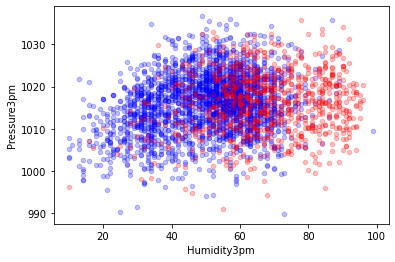

In [4]:
dataset = data[['Humidity3pm', 'Pressure3pm', 'RainTomorrow']]

fig, ax = plt.subplots()

dataset[dataset['RainTomorrow'] == 'No'].plot.scatter(x='Humidity3pm', y='Pressure3pm', c='b', alpha=.25, ax=ax)
dataset[dataset['RainTomorrow'] == 'Yes'].plot.scatter(x='Humidity3pm', y='Pressure3pm', c='r', alpha=.25, ax=ax)

plt.show()

### K-nearest-neighbors Classification (KNN Classification)
- Given an input, choose the most common class out of the k nearest data points

#### Some approaches
- Regularization: penalizing hypothesis that are more complex to favore simpler ones
- Holdout Cross-validation#Holdout_method): split data into training and testing sets.
- k-fold Cross validation#k-fold_cross-validation): Splitting data into  sets and run  experiments with each set as test set once (using the remaing data as training set)

##### Programming Notes:
- Libraries used
    + numpy - scientific computing with Python (Lecture on NumPy)
    + sklearn - tools for predictive data analysis
- Functionality and concepts used
    + dropna() clean the pandas DataFrame
    + List Comprehension to convert data (Lecture on List Comprehension)
    + train_test_split from sklearn
    + KNeighborsClassifier to train (fit) the model
    + metrics.accuracy_score to get the accuracy of the predictions

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
dataset_clean = dataset.dropna()
len(dataset), len(dataset_clean)

(3337, 3309)

In [14]:
X = dataset_clean[['Humidity3pm', 'Pressure3pm']]
y = dataset_clean['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

In [15]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
X_train.iloc[0]

Humidity3pm      25.0
Pressure3pm    1016.5
Name: 2008-09-16 00:00:00, dtype: float64

In [20]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.8067632850241546

In [23]:
sum(y==0)/len(y)

0.7407071622846781

In [27]:
X_map = np.random.rand(10000, 2)
X_map = X_map*(100, 50) + (0, 990)

D:\anaconda3\envs\{tunglam}\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


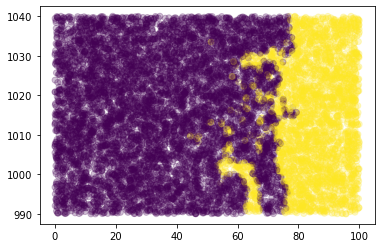

In [33]:
fig, ax = plt.subplots()

y_map = neigh.predict(X_map)

ax.scatter(x=X_map[:,0], y=X_map[:,1], alpha=.25, c=y_map)

In [34]:
scores = []

for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    y_pred = neigh.predict(X_test)
    accuracy_score(y_test, y_pred)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

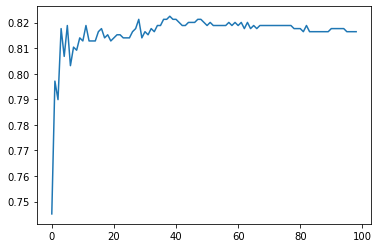

In [35]:
fig, ax = plt.subplots()

ax.plot(scores)